---------------------------------------------------------TASK 5------------------------------------------------------------
------>>>>Exploratory Data Analysis - Sports

Importing necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import plotly.express as px

Importing dataset-

In [2]:
matches = pd.read_csv(r'C:\Users\dell\OneDrive\Desktop\VS CODE\.vscode\GRIP TASKS\matches.csv')
deliveries = pd.read_csv(r'C:\Users\dell\OneDrive\Desktop\VS CODE\.vscode\GRIP TASKS\deliveries.csv')

PREPROCESSING DATA-

In [3]:
matches.shape

(756, 18)

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [14]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
matches.isnull().sum()                     #checking for null values

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Here we can see that city and umpire3 column contains null values.

In [12]:
for i in matches.columns.tolist():
  print("No. of unique values in ",i,"is",matches[i].nunique(),".")
     

No. of unique values in  id is 756 .
No. of unique values in  season is 12 .
No. of unique values in  city is 32 .
No. of unique values in  date is 546 .
No. of unique values in  team1 is 15 .
No. of unique values in  team2 is 15 .
No. of unique values in  toss_winner is 15 .
No. of unique values in  toss_decision is 2 .
No. of unique values in  result is 3 .
No. of unique values in  dl_applied is 2 .
No. of unique values in  winner is 15 .
No. of unique values in  win_by_runs is 89 .
No. of unique values in  win_by_wickets is 11 .
No. of unique values in  player_of_match is 226 .
No. of unique values in  venue is 41 .
No. of unique values in  umpire1 is 61 .
No. of unique values in  umpire2 is 65 .
No. of unique values in  umpire3 is 25 .


In [15]:
deliveries.shape

(179078, 21)

In [16]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [18]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [19]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

MERGING THE DATASETS

In [23]:
season_df=matches[['id','season','winner']]

df=deliveries.merge(season_df,how='inner',left_on='match_id',right_on='id')

In [24]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


In [27]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'winner'],
      dtype='object')

DATA VISUALIZATION

NUMBER OF WINS BY EACH TEAM

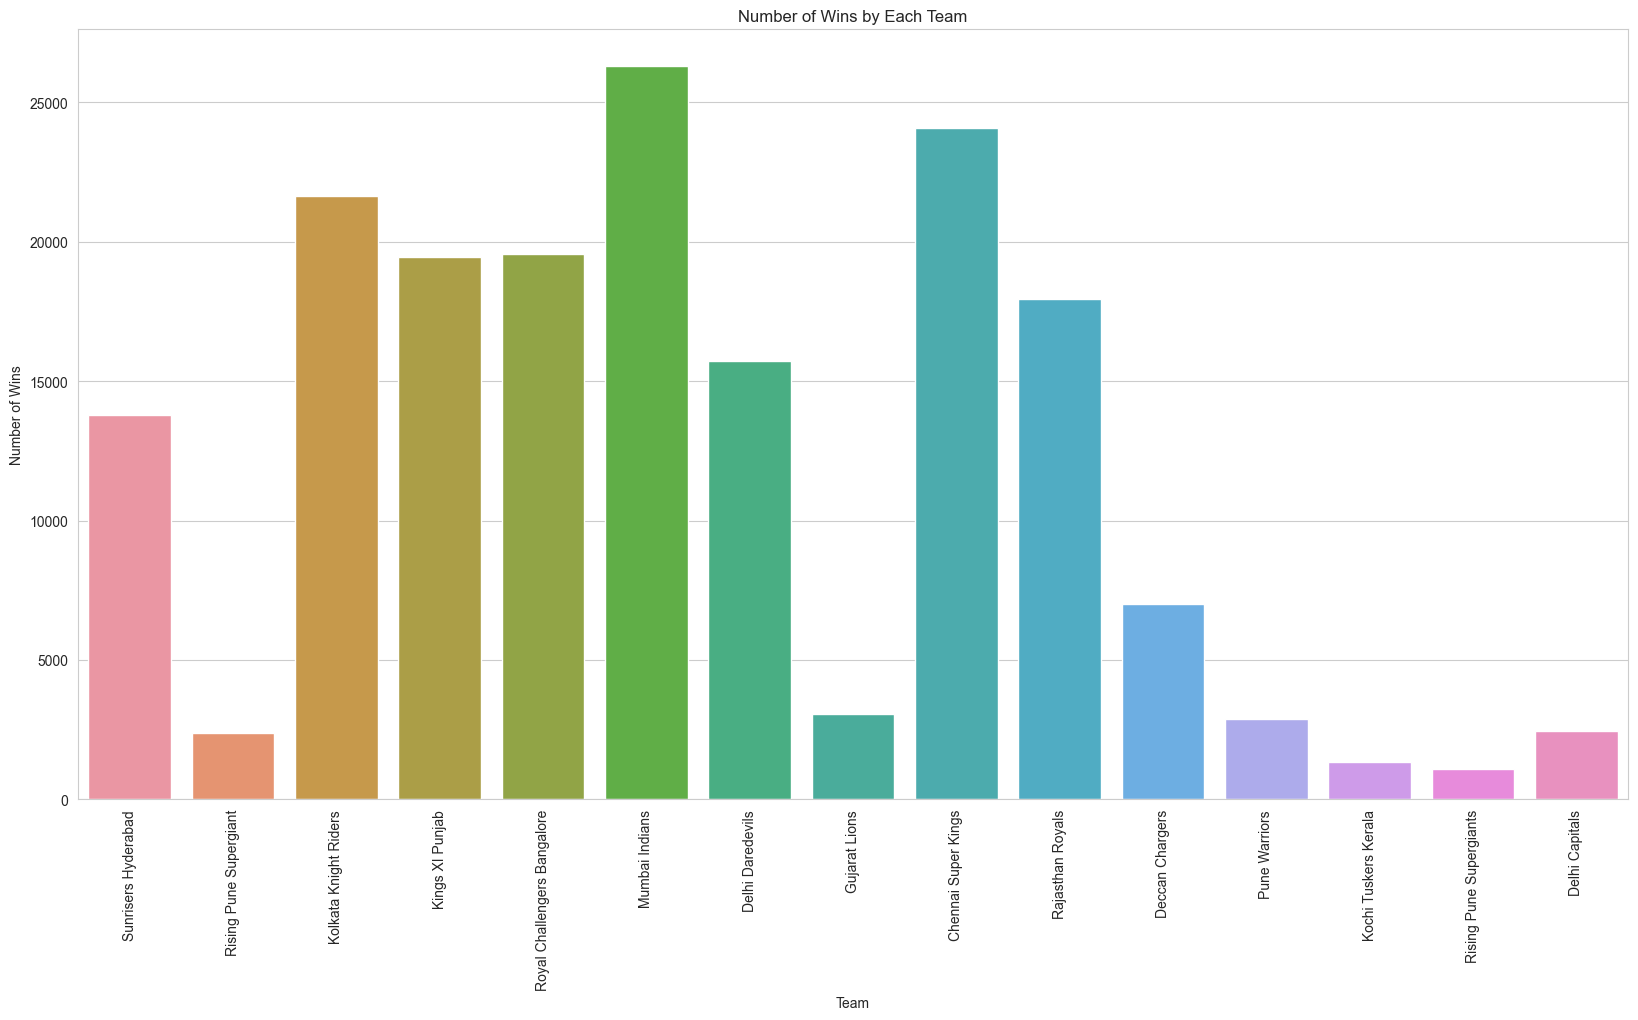

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
sns.countplot(x='winner', data=df)
plt.title('Number of Wins by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()


DISTRIBUTION OF DISSMISSALS

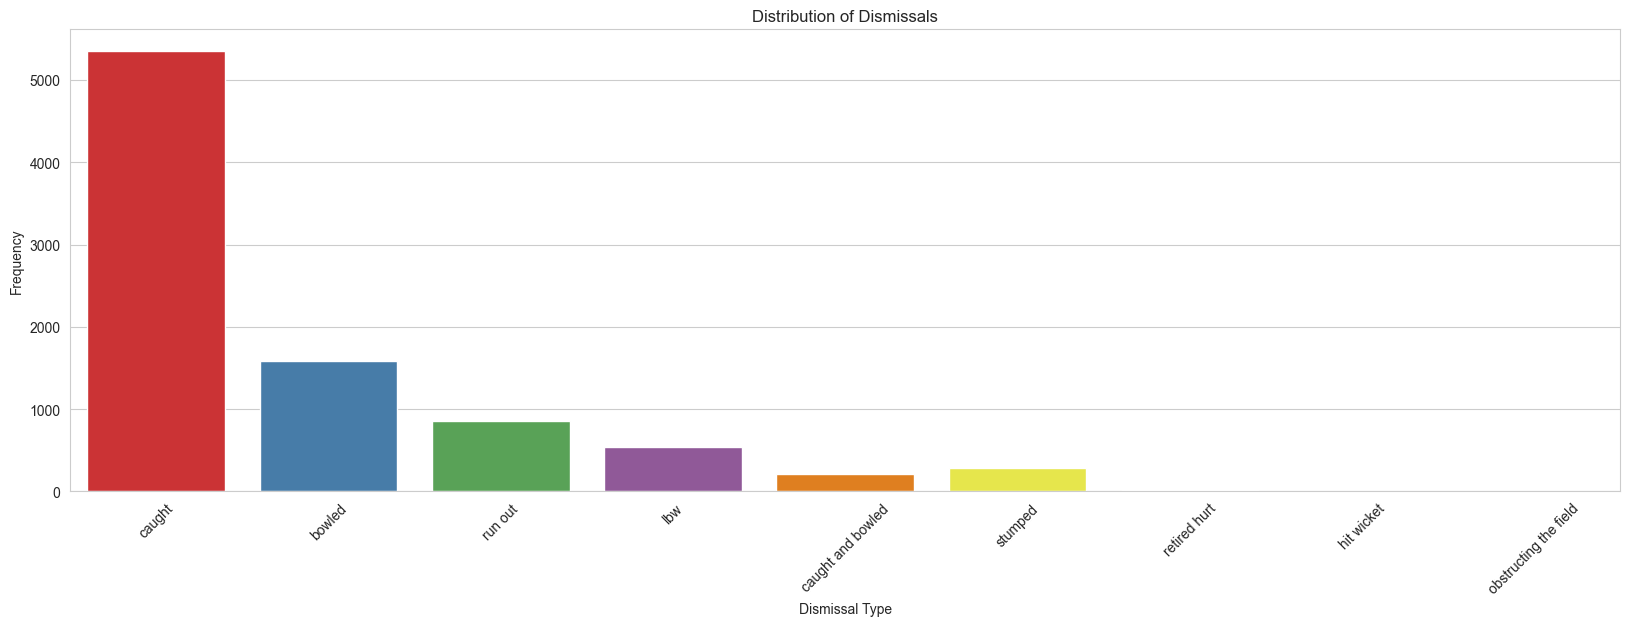

In [40]:
sns.set_palette('Set1')  # set the color palette
sns.set_style('whitegrid')
plt.figure(figsize=(20, 6))
sns.countplot(x='dismissal_kind', data=df)
plt.title('Distribution of Dismissals')
plt.xlabel('Dismissal Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

DISTRIBUTION OF INDIVIDUAL PLAYER SCORES

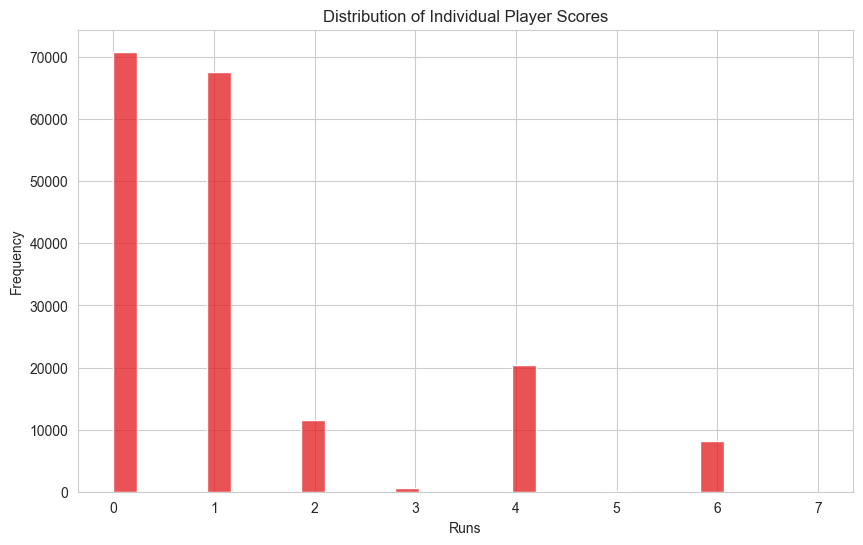

In [42]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['batsman_runs'], bins=30)
plt.title('Distribution of Individual Player Scores')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()


DISTRIBUTION OF WICKETS TAKEN BY EACH BOWLING TEAM

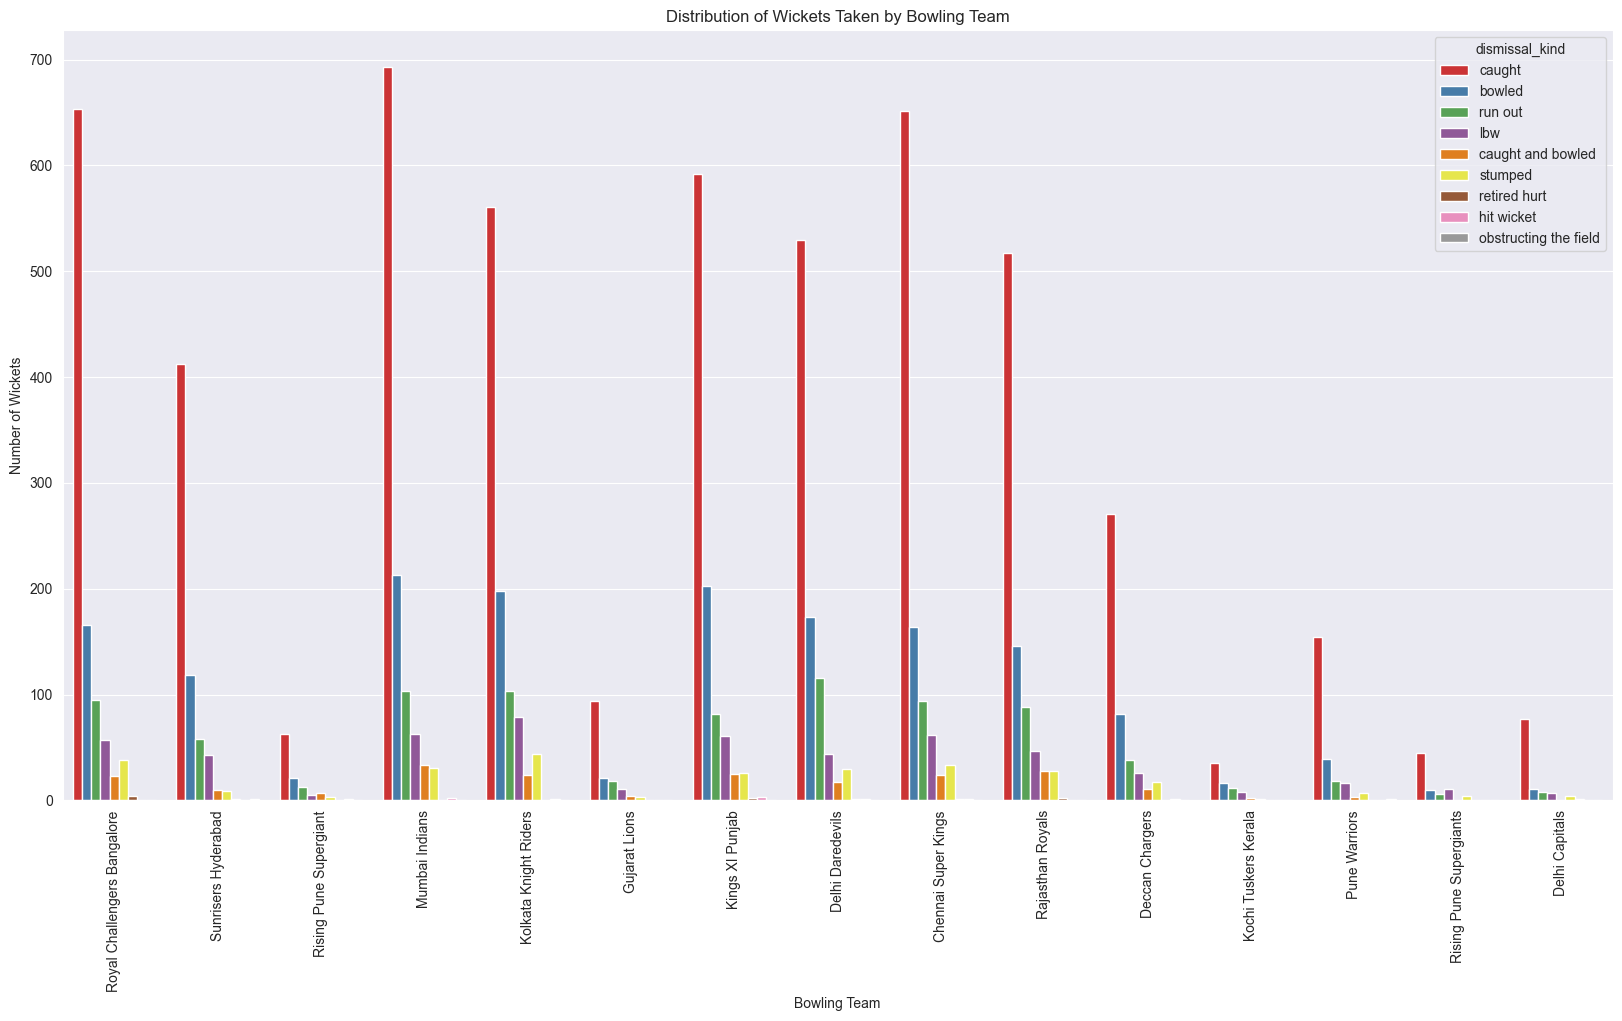

In [44]:
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10))
sns.countplot(x='bowling_team', hue='dismissal_kind', data=df)
plt.title('Distribution of Wickets Taken by Bowling Team')
plt.xlabel('Bowling Team')
plt.ylabel('Number of Wickets')
plt.xticks(rotation=90)
plt.show()

Change of average total runs scored per match over the seasons

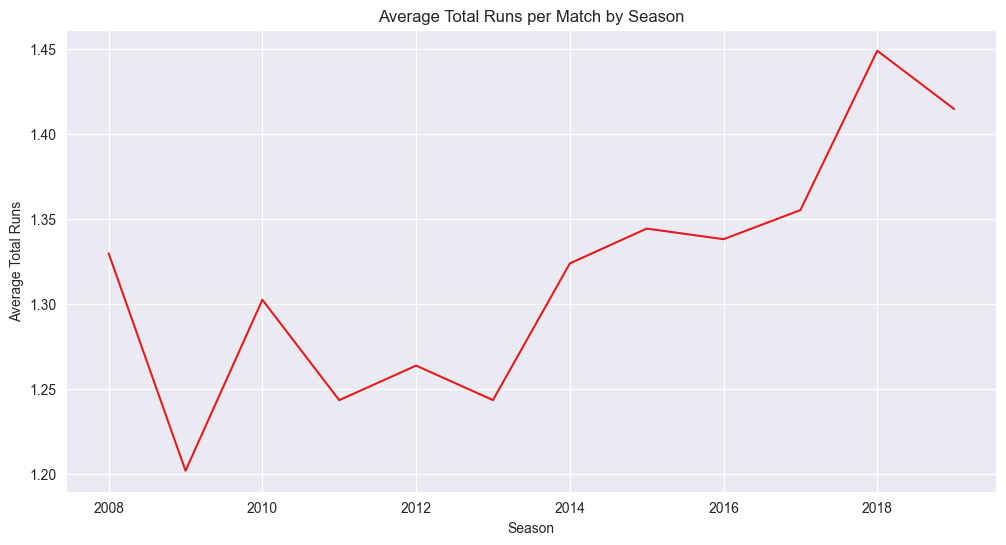

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(df.groupby('season').mean().reset_index()['season'], df.groupby('season').mean().reset_index()['total_runs'])
plt.title('Average Total Runs per Match by Season')
plt.xlabel('Season')
plt.ylabel('Average Total Runs')
plt.show()

Numbers of matches won by Toss result

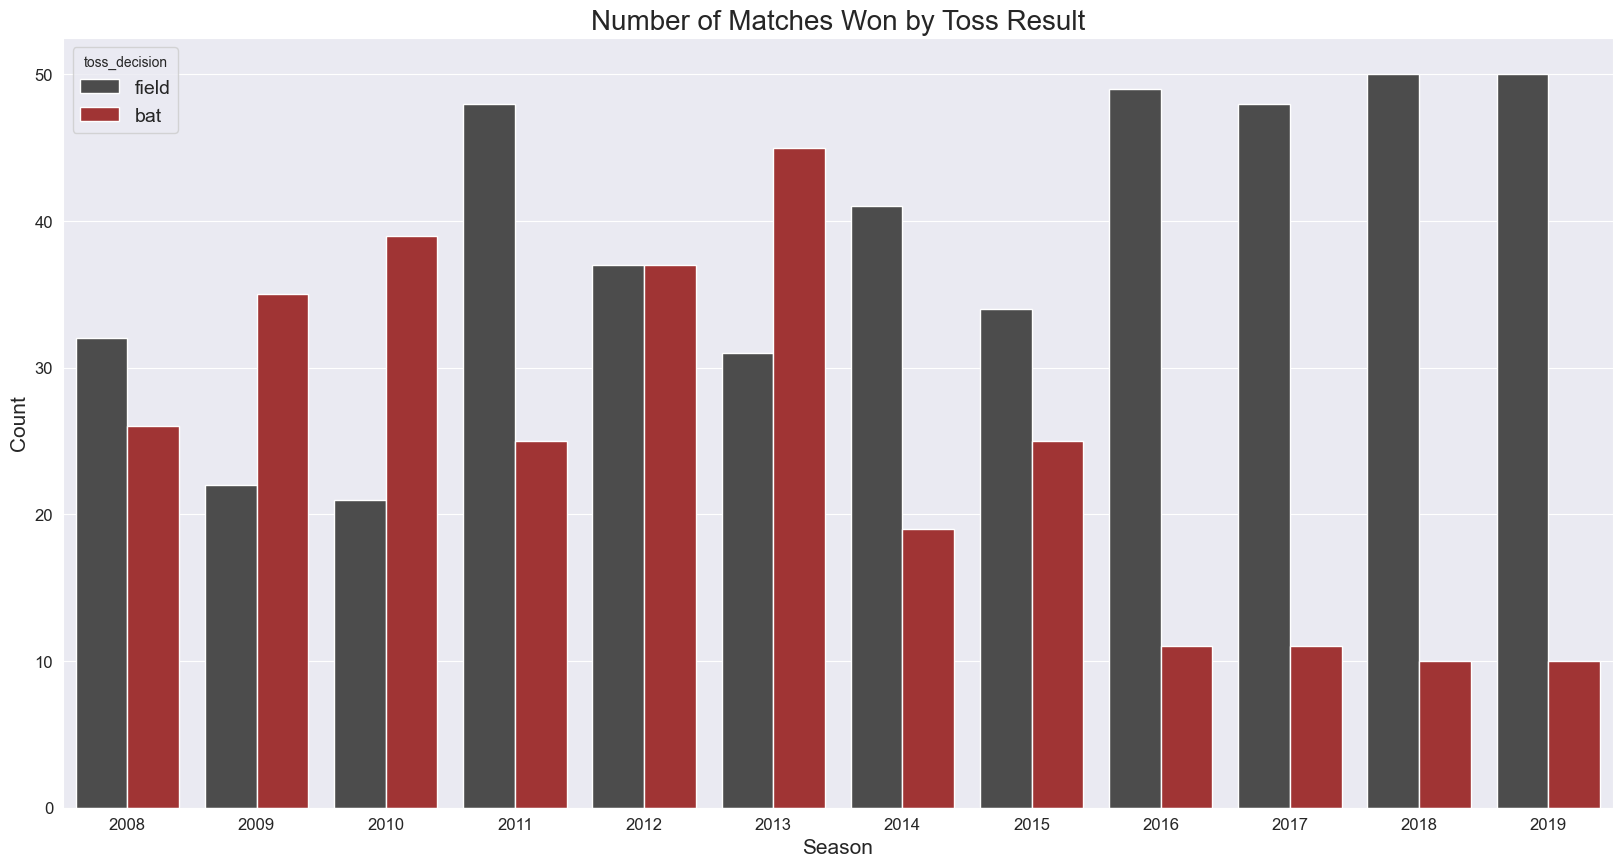

In [46]:
custom_palette = {'field': '#4C4C4C', 'bat': '#B22222'}

plt.figure(figsize=(20,10))
sns.countplot(x='season', hue='toss_decision', data=matches, palette=custom_palette)
plt.title('Number of Matches Won by Toss Result', fontsize=20)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='toss_decision', fontsize=14)
plt.show()

creating win_by and toss column

In [47]:
matches['win_by']=np.where(matches['win_by_runs']>0,'Bat first','Bowl first')

In [48]:
toss=matches.toss_decision.value_counts()

FINAL DATAFRAME

In [49]:
final_matches_df=matches.drop_duplicates(subset=['season'], keep='last')

final_matches_df[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


PIE CHART

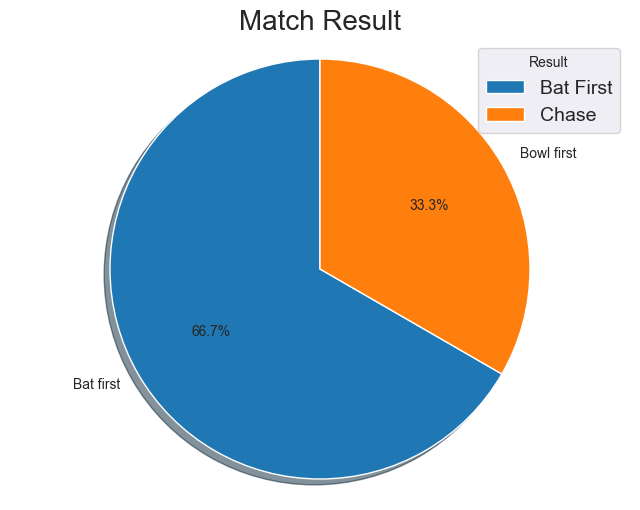

In [60]:
match = final_matches_df.win_by.value_counts()
labels = np.array(match.index)
sizes = match.values


custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=custom_colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Match Result', fontsize=20)
plt.axis('equal')
plt.legend(title='Result', labels=['Bat First', 'Chase'], fontsize=14)
plt.show()


Calculating the number of matches won by each team and creating the win_counts dataframe

In [61]:
win_counts = matches.winner.value_counts()

Sorting the win counts in descending order and selecting the top 10 teams and creating the dataframe called top_teams

In [62]:
top_teams = win_counts.sort_values(ascending=False).head(10)

Most Succesful Teams

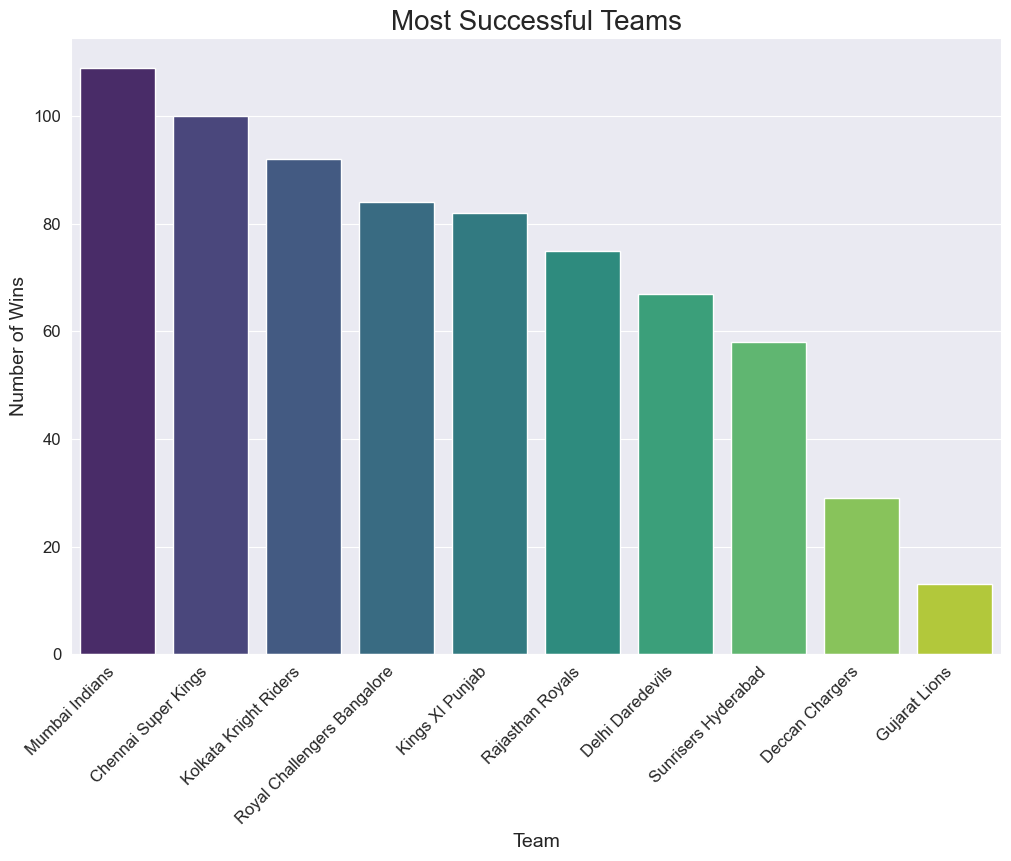

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_teams.index, y=top_teams.values, palette='viridis')
plt.title('Most Successful Teams', fontsize=20)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of Wins', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

     

Factors Contributing to Win or Loss of a Team

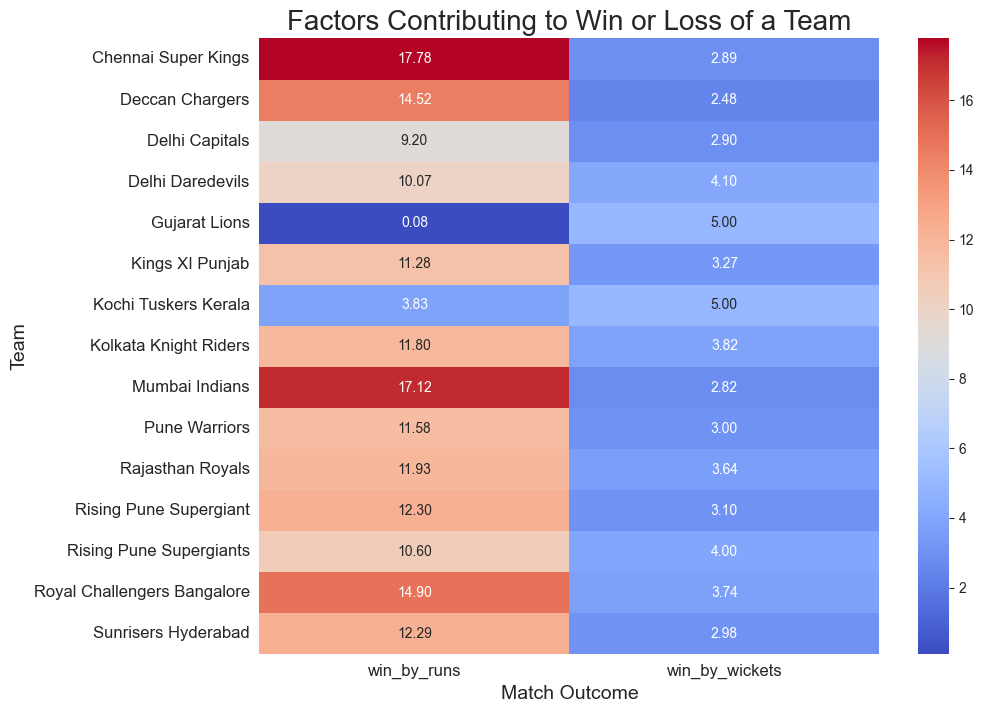

In [64]:
team_performance = matches[['winner', 'win_by_runs', 'win_by_wickets', 'player_of_match']]
team_means = team_performance.groupby('winner').mean()
plt.figure(figsize=(10, 8))
sns.heatmap(team_means, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Factors Contributing to Win or Loss of a Team', fontsize=20)
plt.xlabel('Match Outcome', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

     

In [65]:
# Find the players with the most "Man of the Match" awards
top_players = matches['player_of_match'].value_counts().head(10)

In [66]:
# Finding the teams with the most wins
top_teams = matches['winner'].value_counts().head(10)

In [67]:
# Finding the top batsmen by total runs scored
batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

In [68]:
# Finding the top bowlers by total wickets taken
bowlers = deliveries[deliveries['dismissal_kind'].isin(['bowled', 'caught', 'caught and bowled', 'lbw', 'stumped'])] \
    .groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)

In [69]:
# Printing the results
print('Top players of the match:\n', top_players)
print('\nTop teams:\n', top_teams)
print('\nTop batsmen:\n', batsmen)
print('\nTop bowlers:\n', bowlers)

Top players of the match:
 CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

Top teams:
 Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Name: winner, dtype: int64

Top batsmen:
 batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

Top bowlers:
 bowler
SL Malinga         170
A Mish

Conclusions-

-->CH Gayle, AB de Villiers, and Rohit Sharma are the top three players with the most player of the match awards in IPL history.

-->Mumbai Indians is the most successful team in IPL with 109 wins followed by Chennai Super Kings with 100 wins.

-->Virat Kohli, Suresh Raina, and Rohit Sharma are the top three batsmen with the most runs in IPL history.

-->Lasith Malinga, Amit Mishra, and Harbhajan Singh are the top three bowlers with the most wickets in IPL history.